# Assignment - 16
# Text Mining
# Question - 1
Elon musk tweets

In [44]:
!pip install textblob

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 

In [46]:
import re
import nltk
from textblob import TextBlob
nltk.download('punkt')
nltk.download('stopwords') 
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
df=pd.read_csv("Elon_musk.csv",encoding='latin-1')
df
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [48]:
df["Text"]

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

# Exploring Data

In [49]:
import pandas_profiling as pp 
EDA_report = pp.ProfileReport(df)
EDA_report.to_file(output_file='report.html')
EDA_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
stp_words=stopwords.words("english")
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [51]:
one_tweet=df.iloc[4]["Text"]


In [52]:
def TweetCleaning(tweets):
 cleantweet=re.sub(r"@[a-zA-Z0-9]+"," ",tweets)
 cleantweet=re.sub(r"#[a-zA-Z0-9]+"," ",cleantweet)
 cleantweet=''.join(word for word in cleantweet.split() if word not in stp_words)
 return cleantweet

In [53]:
def calpolarity(tweets):
    return TextBlob(tweets).sentiment.polarity

In [54]:
def calSubjectivity(tweets):
    return TextBlob(tweets).sentiment.subjectivity

# Segmenting tweets as 'Positive','Negative' and 'Neutral'

In [55]:
def segmentation(tweets):
    if tweets > 0:
        return "positive"
    if tweets== 0:
        return "neutral"
    else:
        return "negative"


In [56]:
df["cleanedtweets"]=df['Text'].apply(TweetCleaning)
df['polarity']=df["cleanedtweets"].apply(calpolarity)
df['subjectivity']=df["cleanedtweets"].apply(calSubjectivity)
df['segmentation']=df["polarity"].apply(segmentation)

In [57]:
df.head()

,Unnamed: 0,Text,cleanedtweets,polarity,subjectivity,segmentation
0,1,@kunalb11 Im an alien,Imalien,0.0,0.0,neutral
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,_AA_CarmackRaytracingCyberpunkHDRnext-level.Ha...,0.0,0.0,neutral
2,3,@joerogan @Spotify Great interview!,Greatinterview!,0.0,0.0,neutral
3,4,@gtera27 Doge is underestimated,Dogeunderestimated,0.0,0.0,neutral
4,5,@teslacn Congratulations Tesla China for amazi...,CongratulationsTeslaChinaamazingexecutionlasty...,0.0,0.0,neutral


In [58]:
df.pivot_table(index=['segmentation'],aggfunc={"segmentation":'count'})

,segmentation
segmentation,
negative,3
neutral,1914
positive,82


we have total 3 negative,1914 neutral and 82 positive tweets

In [59]:
df.sort_values(by=['polarity'],ascending=False).head(3)


,Unnamed: 0,Text,cleanedtweets,polarity,subjectivity,segmentation
1594,1595,@Erdayastronaut Impressive,Impressive,1.0,1.0,positive
978,979,@lexfridman Nice,Nice,0.6,1.0,positive
1017,1018,@Carrenimfa Interesting,Interesting,0.5,0.5,positive


In [60]:
df.sort_values(by=['polarity'],ascending=True).head(3)


,Unnamed: 0,Text,cleanedtweets,polarity,subjectivity,segmentation
852,853,@flcnhvy @NASASpaceflight @Erdayastronaut Minor,Minor,-0.05,0.20,negative
417,418,@OLHZN Minor,Minor,-0.05,0.20,negative
741,742,@PPathole Strange,Strange,-0.05,0.15,negative


In [61]:
df['polarity']==0
df[df['polarity']==0].head(3)

,Unnamed: 0,Text,cleanedtweets,polarity,subjectivity,segmentation
0,1,@kunalb11 Im an alien,Imalien,0.0,0.0,neutral
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,_AA_CarmackRaytracingCyberpunkHDRnext-level.Ha...,0.0,0.0,neutral
2,3,@joerogan @Spotify Great interview!,Greatinterview!,0.0,0.0,neutral


In [62]:
df["cleanedtweets"]


0                                                Imalien
1       _AA_CarmackRaytracingCyberpunkHDRnext-level.Ha...
2                                         Greatinterview!
3                                      Dogeunderestimated
4       CongratulationsTeslaChinaamazingexecutionlasty...
                              ...                        
1994    True,soundssurreal,negativepropagandastill&amp...
1995    Makesurereadurterms&amp;conditionsclickingaccept!
1996                                        SamwiseGamgee
1997              AlthoDumbDumber<U+0001F525><U+0001F525>
1998                               ProgressupdateAugust28
Name: cleanedtweets, Length: 1999, dtype: object

In [63]:
text = ' '.join(df["cleanedtweets"])
text

'I\x92malien _AA_CarmackRaytracingCyberpunkHDRnext-level.Havetriedit? Greatinterview! Dogeunderestimated CongratulationsTeslaChinaamazingexecutionlastyear.Nownextevenmore!! HappyNewYearOx!https://t.co/9WFKMYu2oj Frodounderdoge,Allthoughtwouldfail,Himselfall.https://t.co/zGxJFDzzrM _Hahathanks:) Indeed!Tweetsdefinitelyrepresentreal-worldtimeallocation. Theentertainingoutcomelikely Justsent JustagreeClubhouse https://t.co/3rWE9uHSTS It\x92sgettingreal BoughtDogecoinlilX,toddlerhodler Hedefinitelyissues,sentencingseemsbithigh Thanksfixing Pleaseunlockaccount <U+0001F923><U+0001F923> Thistruepowerhahahttps://t.co/Fc9uhQSd7O Anycryptowalletwon\x92tgiveprivatekeysavoidedcosts Yourappsucks RT:NASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemission!https://t.co/3pWt Yes _Oncepredictcashflowreasonablywell,StarlinkIPO _Starlinkstaggeringlydifficulttechnical&amp;economicendeavor.However,https://t.co/9Z8Ac6skqx _SpaceXneedspassdeepchasmnegativecashflownextyearhttps://t.co/7J1c9

# Removing Punctuation marks

In [64]:
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

'I\x92malien AACarmackRaytracingCyberpunkHDRnextlevelHavetriedit Greatinterview Dogeunderestimated CongratulationsTeslaChinaamazingexecutionlastyearNownextevenmore HappyNewYearOxhttpstco9WFKMYu2oj FrodounderdogeAllthoughtwouldfailHimselfallhttpstcozGxJFDzzrM Hahathanks IndeedTweetsdefinitelyrepresentrealworldtimeallocation Theentertainingoutcomelikely Justsent JustagreeClubhouse httpstco3rWE9uHSTS It\x92sgettingreal BoughtDogecoinlilXtoddlerhodler Hedefinitelyissuessentencingseemsbithigh Thanksfixing Pleaseunlockaccount U0001F923U0001F923 ThistruepowerhahahttpstcoFc9uhQSd7O Anycryptowalletwon\x92tgiveprivatekeysavoidedcosts Yourappsucks RTNASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemissionhttpstco3pWt Yes OncepredictcashflowreasonablywellStarlinkIPO StarlinkstaggeringlydifficulttechnicalampeconomicendeavorHoweverhttpstco9Z8Ac6skqx SpaceXneedspassdeepchasmnegativecashflownextyearhttpstco7J1c92hdjl AACarmackLowestcostpertoncarbonsequesterednetvalueproductmadeMusts

# Tokenization

In [65]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])


['I\x92malien', 'AACarmackRaytracingCyberpunkHDRnextlevelHavetriedit', 'Greatinterview', 'Dogeunderestimated', 'CongratulationsTeslaChinaamazingexecutionlastyearNownextevenmore', 'HappyNewYearOxhttpstco9WFKMYu2oj', 'FrodounderdogeAllthoughtwouldfailHimselfallhttpstcozGxJFDzzrM', 'Hahathanks', 'IndeedTweetsdefinitelyrepresentrealworldtimeallocation', 'Theentertainingoutcomelikely', 'Justsent', 'JustagreeClubhouse', 'httpstco3rWE9uHSTS', 'It\x92sgettingreal', 'BoughtDogecoinlilXtoddlerhodler', 'Hedefinitelyissuessentencingseemsbithigh', 'Thanksfixing', 'Pleaseunlockaccount', 'U0001F923U0001F923', 'ThistruepowerhahahttpstcoFc9uhQSd7O', 'Anycryptowalletwon\x92tgiveprivatekeysavoidedcosts', 'Yourappsucks', 'RTNASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemissionhttpstco3pWt', 'Yes', 'OncepredictcashflowreasonablywellStarlinkIPO', 'StarlinkstaggeringlydifficulttechnicalampeconomicendeavorHoweverhttpstco9Z8Ac6skqx', 'SpaceXneedspassdeepchasmnegativecashflownextyearhttpst

# Removing stop words

In [66]:
my_stop_words = stopwords.words('english')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]


In [67]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:40])

['i\x92malien', 'aacarmackraytracingcyberpunkhdrnextlevelhavetriedit', 'greatinterview', 'dogeunderestimated', 'congratulationsteslachinaamazingexecutionlastyearnownextevenmore', 'happynewyearoxhttpstco9wfkmyu2oj', 'frodounderdogeallthoughtwouldfailhimselfallhttpstcozgxjfdzzrm', 'hahathanks', 'indeedtweetsdefinitelyrepresentrealworldtimeallocation', 'theentertainingoutcomelikely', 'justsent', 'justagreeclubhouse', 'httpstco3rwe9uhsts', 'it\x92sgettingreal', 'boughtdogecoinlilxtoddlerhodler', 'hedefinitelyissuessentencingseemsbithigh', 'thanksfixing', 'pleaseunlockaccount', 'u0001f923u0001f923', 'thistruepowerhahahttpstcofc9uhqsd7o', 'anycryptowalletwon\x92tgiveprivatekeysavoidedcosts', 'yourappsucks', 'rtnasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemissionhttpstco3pwt', 'yes', 'oncepredictcashflowreasonablywellstarlinkipo', 'starlinkstaggeringlydifficulttechnicalampeconomicendeavorhoweverhttpstco9z8ac6skqx', 'spacexneedspassdeepchasmnegativecashflownextyearhttpst

#  Stemming the data

In [68]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:10])


['i\x92malien', 'aacarmackraytracingcyberpunkhdrnextlevelhavetriedit', 'greatinterview', 'dogeunderestim', 'congratulationsteslachinaamazingexecutionlastyearnownextevenmor', 'happynewyearoxhttpstco9wfkmyu2oj', 'frodounderdogeallthoughtwouldfailhimselfallhttpstcozgxjfdzzrm', 'hahathank', 'indeedtweetsdefinitelyrepresentrealworldtimealloc', 'theentertainingoutcomelik']


# Lemmatization

In [69]:
import spacy
nlp=spacy.load("en_core_web_sm")
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])


Imalien AACarmackRaytracingCyberpunkHDRnextlevelHavetriedit Greatinterview Dogeunderestimated CongratulationsTeslaChinaamazingexecutionlastyearNownextevenmore HappyNewYearOxhttpstco9WFKMYu2oj FrodounderdogeAllthoughtwouldfailHimselfallhttpstcozGxJFDzzrM Hahathanks IndeedTweetsdefinitelyrepresentrealworldtimeallocation Theentertainingoutcomelikely Justsent JustagreeClubhouse httpstco3rWE9uHSTS Itsgettingreal BoughtDogecoinlilXtoddlerhodler Hedefinitelyissuessentencingseemsbithigh Thanksfixing Pleaseunlockaccount U0001F923U0001F923 ThistruepowerhahahttpstcoFc9uhQSd7O Anycryptowalletwontgiveprivatekeysavoidedcosts Yourappsucks RTNASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemissionhttpstco3pWt Yes OncepredictcashflowreasonablywellStarlinkIPO StarlinkstaggeringlydifficulttechnicalampeconomicendeavorHoweverhttpstco9Z8Ac6skqx SpaceXneedspassdeepchasmnegativecashflownextyearhttpstco7J1c92hdjl AACarmackLowestcostpertoncarbonsequesterednetvalueproductmadeMustscalableght

In [70]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['I\x92malien', 'AACarmackRaytracingCyberpunkHDRnextlevelHavetriedit', 'Greatinterview', 'dogeunderestimate', 'congratulationsteslachinaamazingexecutionlastyearnownextevenmore', 'happynewyearoxhttpstco9wfkmyu2oj', 'frodounderdogeallthoughtwouldfailhimselfallhttpstcozgxjfdzzrm', 'Hahathanks', 'IndeedTweetsdefinitelyrepresentrealworldtimeallocation', 'theentertainingoutcomelikely', 'Justsent', 'JustagreeClubhouse', 'httpstco3rWE9uHSTS', 'it\x92sgettingreal', 'BoughtDogecoinlilXtoddlerhodler', 'Hedefinitelyissuessentencingseemsbithigh', 'Thanksfixing', 'Pleaseunlockaccount', 'U0001F923U0001F923', 'ThistruepowerhahahttpstcoFc9uhQSd7O', 'Anycryptowalletwon\x92tgiveprivatekeysavoidedcosts', 'Yourappsucks', 'rtnasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemissionhttpstco3pwt', 'yes', 'oncepredictcashflowreasonablywellstarlinkipo']


# Feature Extraction

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(stemmed_tokens)
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)
print(vectorizer.vocabulary_)

{'malien': 846, 'aacarmackraytracingcyberpunkhdrnextlevelhavetriedit': 41, 'greatinterview': 528, 'dogeunderestim': 344, 'congratulationsteslachinaamazingexecutionlastyearnownextevenmor': 298, 'happynewyearoxhttpstco9wfkmyu2oj': 558, 'frodounderdogeallthoughtwouldfailhimselfallhttpstcozgxjfdzzrm': 478, 'hahathank': 552, 'indeedtweetsdefinitelyrepresentrealworldtimealloc': 699, 'theentertainingoutcomelik': 1696, 'justsent': 763, 'justagreeclubhous': 754, 'httpstco3rwe9uhst': 603, 'it': 719, 'sgettingr': 1397, 'boughtdogecoinlilxtoddlerhodl': 225, 'hedefinitelyissuessentencingseemsbithigh': 570, 'thanksfix': 1665, 'pleaseunlockaccount': 1071, 'u0001f923u0001f923': 1896, 'thistruepowerhahahttpstcofc9uhqsd7o': 1778, 'anycryptowalletwon': 146, 'tgiveprivatekeysavoidedcost': 1660, 'yourappsuck': 2111, 'rtnasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemissionhttpstco3pwt': 1231, 'ye': 2053, 'oncepredictcashflowreasonablywellstarlinkipo': 1026, 'starlinkstaggeringlydifficu

In [72]:
print(vectorizer.get_feature_names()[50:100])

['aacarmackyup', 'about2secsstartingenginesmartytecoveringconcreteshatteredsendingbladeshttpstcovilv1s16yo', 'above50likelymak', 'absolut', 'absolutelydoesn', 'absolutelylonglastingartincrediblydifficult', 'absolutelyproductiontestingrocketengines90httpstcotv3pixzp4i', 'absolutelytheyrocku0001f5a4', 'absolutelyu0001f603u0001f3dd', 'absolutelywereleasefsdsubscriptionearlynextyear', 'absolutelywilltextampvisualizationcouldaddvoicetoo', 'accur', 'accurateanalysisquiteegointelligencegtgt1peoplecommentthreadhahaneithermobileyehttpstcofdligohk01', 'acquisitionsignalexpected5min', 'actuallyit', 'actuallymatt', 'adagiostringsgreathttpstcorgy1p1vg', 'addictednoamppossiblescal', 'addingpeoplenextvers', 'additivemanufacturingpartsstillfarcostlycarsrapidlycreatetoolingaccelhttpstcoz9kxjt9umj', 'adritheresubtleimportantdifferencesusampcanadatrafficrulesbuhttpstcoxzx9ppvl92', 'adriy', 'africabig', 'afshariingeneralneedimprovepodcastsplay', 'after', 'afterdrivewithoutusingprndstalkstickdaysgetsannoyi

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [73]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [74]:
print(X.toarray().shape)

(1993, 2121)


In [75]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(df["cleanedtweets"])
bow_matrix_ngram
print(vectorizer_ngram_range.get_feature_names())

['0001f1e9', '0001f1e9 0001f1ea', '0001f1ea', '0001f339', '0001f3b6', '0001f440', '0001f44d', '0001f495', '0001f4af', '0001f525', '0001f525 0001f525', '0001f5a4', '0001f600', '0001f609', '0001f680', '0001f923', '0001f923 0001f923', '0435', '043b', '043e', '100', '200d', '2192', '2192 https', '2192 https co', '2660', '2660 fe0f', '26a1', '26a1 fe0f', '_enoughyes', 'absolutely', 'agreed', 'also', 'amp', 'amp https', 'amp https co', 'buhttps', 'buhttps co', 'but', 'can', 'co', 'comingsoon', 'cool', 'doesn', 'doge', 'don', 'exactly', 'falcon9', 'fe0f', 'forsure', 'goodanalysis', 'goodpoint', 'greatgame', 'gt', 'haha', 'hahatrue', 'hopefully', 'however', 'https', 'https co', 'indeed', 'it', 'liftoff', 'liftoff https', 'liftoff https co', 'long', 'lt', 'no', 'notbad', 'ok', 'prettymuch', 'rt', 'rt falcon9', 'rt https', 'rt https co', 'rt liftoff', 'rt liftoff https', 'rt_crew', 'shttps', 'shttps co', 'sigh', 'sorry', 'spacex', 'sure', 'technically', 'term', 'tesla', 'thankyou', 'that', 'the'

In [76]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [77]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [78]:
def plot_cloud(wordcloud):

    plt.figure(figsize=(15, 30))
    
    plt.imshow(wordcloud) 
   
    plt.axis("off");

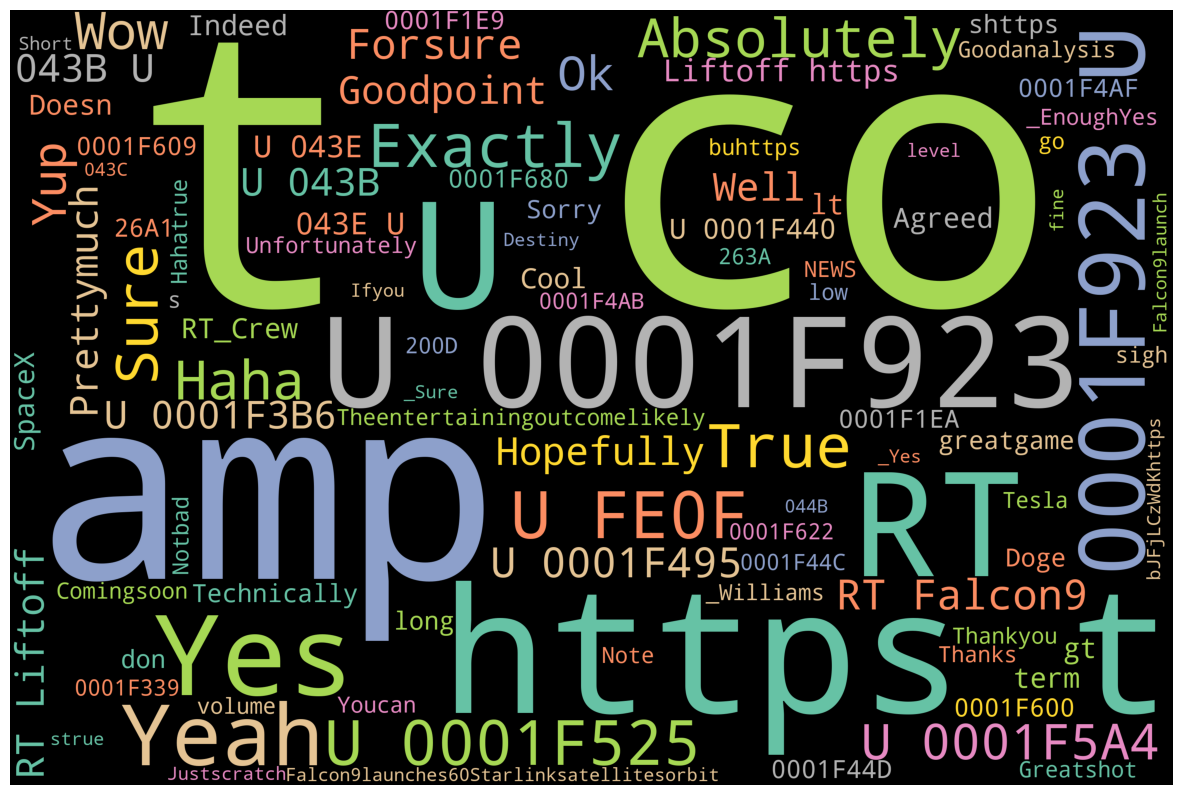

In [79]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(text)
plot_cloud(wordcloud)
plt.show()